In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# 1. Φόρτωση δεδομένων από το Keras (όπως ζητείται στο link της εκφώνησης)
# Το load_data() επιστρέφει 60.000 εικόνες για train και 10.000 για test
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# 2. Κανονικοποίηση (Normalization) στο [0, 1] όπως ζητείται στην παρ. 3 της σελ. 2
# Οι εικόνες είναι σε grayscale με τιμές 0-255. Διαιρούμε με το 255.
x_train_full = x_train_full.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 3. Διαχωρισμός σε Train και Validation (π.χ. κρατάμε το 15-20% για validation)
# Η εκφώνηση ζητάει ρητά τρία σύνολα: train, validation, test
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full,
    y_train_full,
    test_size=0.2, # 20% για validation
    random_state=42
)

# Εκτύπωση των διαστάσεων για επιβεβαίωση
print(f"Train shape: {x_train.shape}")      # Πρέπει να είναι (48000, 28, 28)
print(f"Validation shape: {x_val.shape}")   # Πρέπει να είναι (12000, 28, 28)
print(f"Test shape: {x_test.shape}")        # Πρέπει να είναι (10000, 28, 28)


Train shape: (48000, 28, 28)
Validation shape: (12000, 28, 28)
Test shape: (10000, 28, 28)


ΕΡΩΤΗΜΑ 3

In [ ]:
import time
from sklearn.manifold import TSNE

# 1. Flatten the x_train data
x_train_flat = x_train.reshape(-1, 28 * 28)
print(f"Shape of flattened x_train: {x_train_flat.shape}")

# 2. Initialize and fit the t-SNE model and measure execution time
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)

start_time = time.time()
tsne_results = tsne.fit_transform(x_train_flat)
end_time = time.time()

tsne_train_time = end_time - start_time
print(f"t-SNE fitting time: {tsne_train_time:.2f} seconds")

# 3. Reconstruction: t-SNE does not support inverse_transform
print("t-SNE does not have an inverse_transform method; therefore, image reconstruction from the low-dimensional space is not supported for this technique.")



Shape of flattened x_train: (48000, 784)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE fitting time: 298.38 seconds
t-SNE does not have an inverse_transform method; therefore, image reconstruction from the low-dimensional space is not supported for this technique.


Το ερώτημα 4 δεν μπορεί να εκτελεστεί σε αυτήν την τεχνική.

ΕΡΩΤΗΜΑ 5 SCATTER PLOT

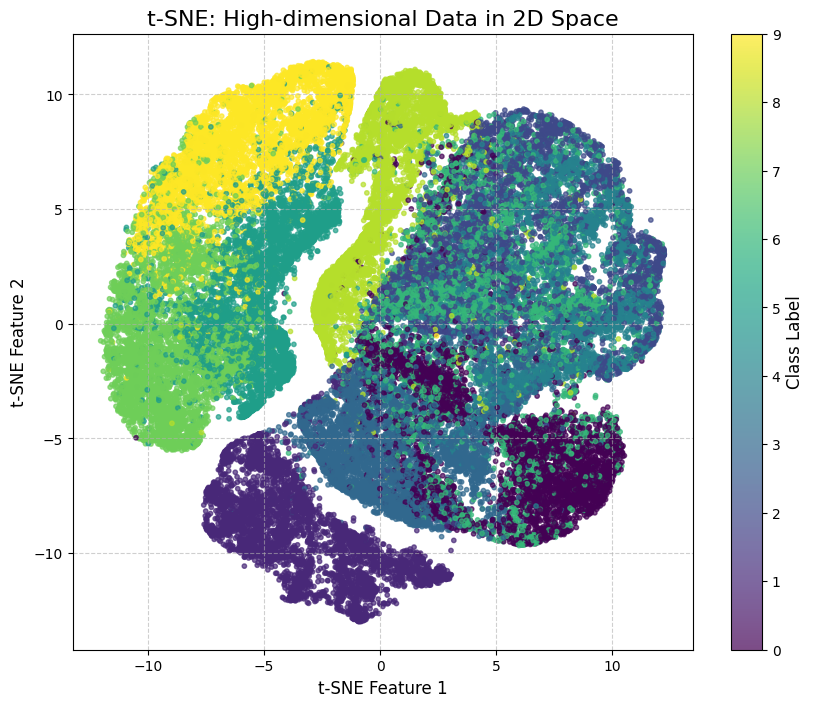

Figure 3: data reduced to two dimensions with t-sne


In [ ]:
import matplotlib.pyplot as plt

# 1. Create the 2D scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    tsne_results[:, 0], # x-coordinates from t-SNE
    tsne_results[:, 1], # y-coordinates from t-SNE
    c=y_train,          # Color points by class label
    cmap='viridis',     # Use the viridis colormap
    s=10,               # Set marker size
    alpha=0.7           # Set transparency
)

# 2. Set labels and title
plt.title('t-SNE: High-dimensional Data in 2D Space', fontsize=16)
plt.xlabel('t-SNE Feature 1', fontsize=12)
plt.ylabel('t-SNE Feature 2', fontsize=12)

# 3. Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Class Label', fontsize=12)

# 4. Display the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5. Print the caption
print('Figure 3: data reduced to two dimensions with t-sne')

ΕΡΩΤΗΜΑ 6

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

# 1. Flatten the x_test data
x_test_flat = x_test.reshape(-1, 28 * 28)
print(f"Shape of flattened x_test: {x_test_flat.shape}")

# 2. Apply t-SNE directly to the flattened test data
tsne_test = TSNE(n_components=2, random_state=42)
x_test_reduced = tsne_test.fit_transform(x_test_flat)

# 3. Print the shape of x_test_reduced
print(f"Shape of x_test_reduced: {x_test_reduced.shape}")

Shape of flattened x_test: (10000, 784)
Shape of x_test_reduced: (10000, 2)


ΕΡΩΤΗΜΑ 7 CLUSTERING MINIBATCH KMEANS

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans

# MiniBatch K-Means on raw data (x_test_flat)
start_time_raw = time.time()
mbkmeans_raw = MiniBatchKMeans(n_clusters=10, random_state=42, n_init='auto', batch_size=256)
raw_data_mbkmeans_labels = mbkmeans_raw.fit_predict(x_test_flat)
end_time_raw = time.time()
raw_data_mbkmeans_time = end_time_raw - start_time_raw

# MiniBatch K-Means on t-SNE reduced data (x_test_reduced)
start_time_tsne = time.time()
mbkmeans_tsne = MiniBatchKMeans(n_clusters=10, random_state=42, n_init='auto', batch_size=256)
tsne_reduced_mbkmeans_labels = mbkmeans_tsne.fit_predict(x_test_reduced)
end_time_tsne = time.time()
tsne_reduced_mbkmeans_time = end_time_tsne - start_time_tsne

print(f"MiniBatchKMeans on Raw Data ({x_test_flat.shape[1]}D) completed in {raw_data_mbkmeans_time:.4f} seconds.")
print(f"Shape of raw_kmeans_labels: {raw_data_mbkmeans_labels.shape}")
print(f"MiniBatchKMeans on t-SNE Data ({x_test_reduced.shape[1]}D) completed in {tsne_reduced_mbkmeans_time:.4f} seconds.")
print(f"Shape of tsne_kmeans_labels: {tsne_reduced_mbkmeans_labels.shape}\n")

print(f"K_MBKMeans: 10")
print(f"Raw KMeans labels (first 5): {raw_data_mbkmeans_labels[:5]}")
print(f"t-SNE KMeans labels (first 5): {tsne_reduced_mbkmeans_labels[:5]}")

MiniBatchKMeans on Raw Data (784D) completed in 0.0708 seconds.
Shape of raw_kmeans_labels: (10000,)
MiniBatchKMeans on t-SNE Data (2D) completed in 0.0097 seconds.
Shape of tsne_kmeans_labels: (10000,)

K_MBKMeans: 10
Raw KMeans labels (first 5): [0 1 2 2 6]
t-SNE KMeans labels (first 5): [4 1 7 7 3]


ΕΡΩΤΗΜΑ 8 ΜΕΤΡΙΚΕΣ

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score
import numpy as np

print("Calculating Clustering Performance Metrics:\n")

# --- Metrics for MiniBatch K-Means on Raw Data (x_test_flat) ---
print("Metrics for Raw Data Clustering (784D):")
ch_score_raw = calinski_harabasz_score(x_test_flat, raw_data_mbkmeans_labels)
db_score_raw = davies_bouldin_score(x_test_flat, raw_data_mbkmeans_labels)
silhouette_score_raw = silhouette_score(x_test_flat, raw_data_mbkmeans_labels)
ari_score_raw = adjusted_rand_score(y_test, raw_data_mbkmeans_labels)

print(f"  Calinski-Harabasz Score: {ch_score_raw:.4f}")
print(f"  Davies-Bouldin Score: {db_score_raw:.4f}")
print(f"  Silhouette Score: {silhouette_score_raw:.4f}")
print(f"  Adjusted Rand Index (ARI): {ari_score_raw:.4f}\n")

# --- Metrics for MiniBatch K-Means on t-SNE Reduced Data (x_test_reduced) ---
print("Metrics for t-SNE Reduced Data Clustering (2D):")
ch_score_tsne = calinski_harabasz_score(x_test_reduced, tsne_reduced_mbkmeans_labels)
db_score_tsne = davies_bouldin_score(x_test_reduced, tsne_reduced_mbkmeans_labels)
silhouette_score_tsne = silhouette_score(x_test_reduced, tsne_reduced_mbkmeans_labels)
ari_score_tsne = adjusted_rand_score(y_test, tsne_reduced_mbkmeans_labels)

print(f"  Calinski-Harabasz Score: {ch_score_tsne:.4f}")
print(f"  Davies-Bouldin Score: {db_score_tsne:.4f}")
print(f"  Silhouette Score: {silhouette_score_tsne:.4f}")
print(f"  Adjusted Rand Index (ARI): {ari_score_tsne:.4f}")

Calculating Clustering Performance Metrics:

Metrics for Raw Data Clustering (784D):
  Calinski-Harabasz Score: 1240.0751
  Davies-Bouldin Score: 1.9861
  Silhouette Score: 0.1444
  Adjusted Rand Index (ARI): 0.3173

Metrics for t-SNE Reduced Data Clustering (2D):
  Calinski-Harabasz Score: 10394.4580
  Davies-Bouldin Score: 0.8295
  Silhouette Score: 0.3928
  Adjusted Rand Index (ARI): 0.4177


ΕΡΩΤΗΜΑ 9

In [ ]:
import pandas as pd

# Define the constant N_CLUSTERS
N_CLUSTERS = 10

# Always re-initialize results_df to avoid duplicate entries from multiple runs
results_df = pd.DataFrame(columns=[
    'Clustering Method',
    'Dimensionality',
    'N_Clusters',
    'Clustering Time (s)',
    'Dimensionality Reduction Time (s)',
    'Calinski-Harabasz Score',
    'Davies-Bouldin Score',
    'Silhouette Score',
    'Adjusted Rand Index (ARI)'
])

# --- Append row for Raw data clustering ---
raw_data_row = {
    'Clustering Method': 'MiniBatch KMeans (Raw Data)',
    'Dimensionality': f"{x_test_flat.shape[1]}D",
    'N_Clusters': N_CLUSTERS,
    'Clustering Time (s)': raw_data_mbkmeans_time,
    'Dimensionality Reduction Time (s)': 0.0, # No dimensionality reduction for raw data
    'Calinski-Harabasz Score': ch_score_raw,
    'Davies-Bouldin Score': db_score_raw,
    'Silhouette Score': silhouette_score_raw,
    'Adjusted Rand Index (ARI)': ari_score_raw
}
results_df = pd.concat([results_df, pd.DataFrame([raw_data_row])], ignore_index=True)

# --- Append row for t-SNE reduced data clustering ---
tsne_data_row = {
    'Dimensionality': f"{x_test_reduced.shape[1]}D",
    'Clustering Method': 'MiniBatch KMeans (t-SNE Reduced Data)',
    'DR Training Time (s)': tsne_train_time,
    'Clustering Time (s)': tsne_reduced_mbkmeans_time,
    'Suggested Clusters (K)': N_CLUSTERS,
    'Calinski-Harabasz Score': ch_score_tsne,
    'Davies-Bouldin Score': db_score_tsne,
    'Silhouette Score': silhouette_score_tsne,
    'Adjusted Rand Index (ARI)': ari_score_tsne
}
results_df = pd.concat([results_df, pd.DataFrame([tsne_data_row])], ignore_index=True)

# Print the final DataFrame
print("\n--- Clustering Results Summary ---")
display(results_df)


--- Clustering Results Summary ---


/tmp/ipython-input-544926041.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([raw_data_row])], ignore_index=True)


,Clustering Method,Dimensionality,N_Clusters,Clustering Time (s),Dimensionality Reduction Time (s),Calinski-Harabasz Score,Davies-Bouldin Score,Silhouette Score,Adjusted Rand Index (ARI),DR Training Time (s),Suggested Clusters (K)
0,MiniBatch KMeans (Raw Data),784D,10,0.070786,0.0,1240.075073,1.986091,0.144434,0.317323,NaN,NaN
1,MiniBatch KMeans (t-SNE Reduced Data),2D,NaN,0.009732,NaN,10394.458008,0.829511,0.392767,0.417736,298.383567,10.0


Ερώτημα 10 ΟΠΤΙΚΟΠΟΙΗΣΗ

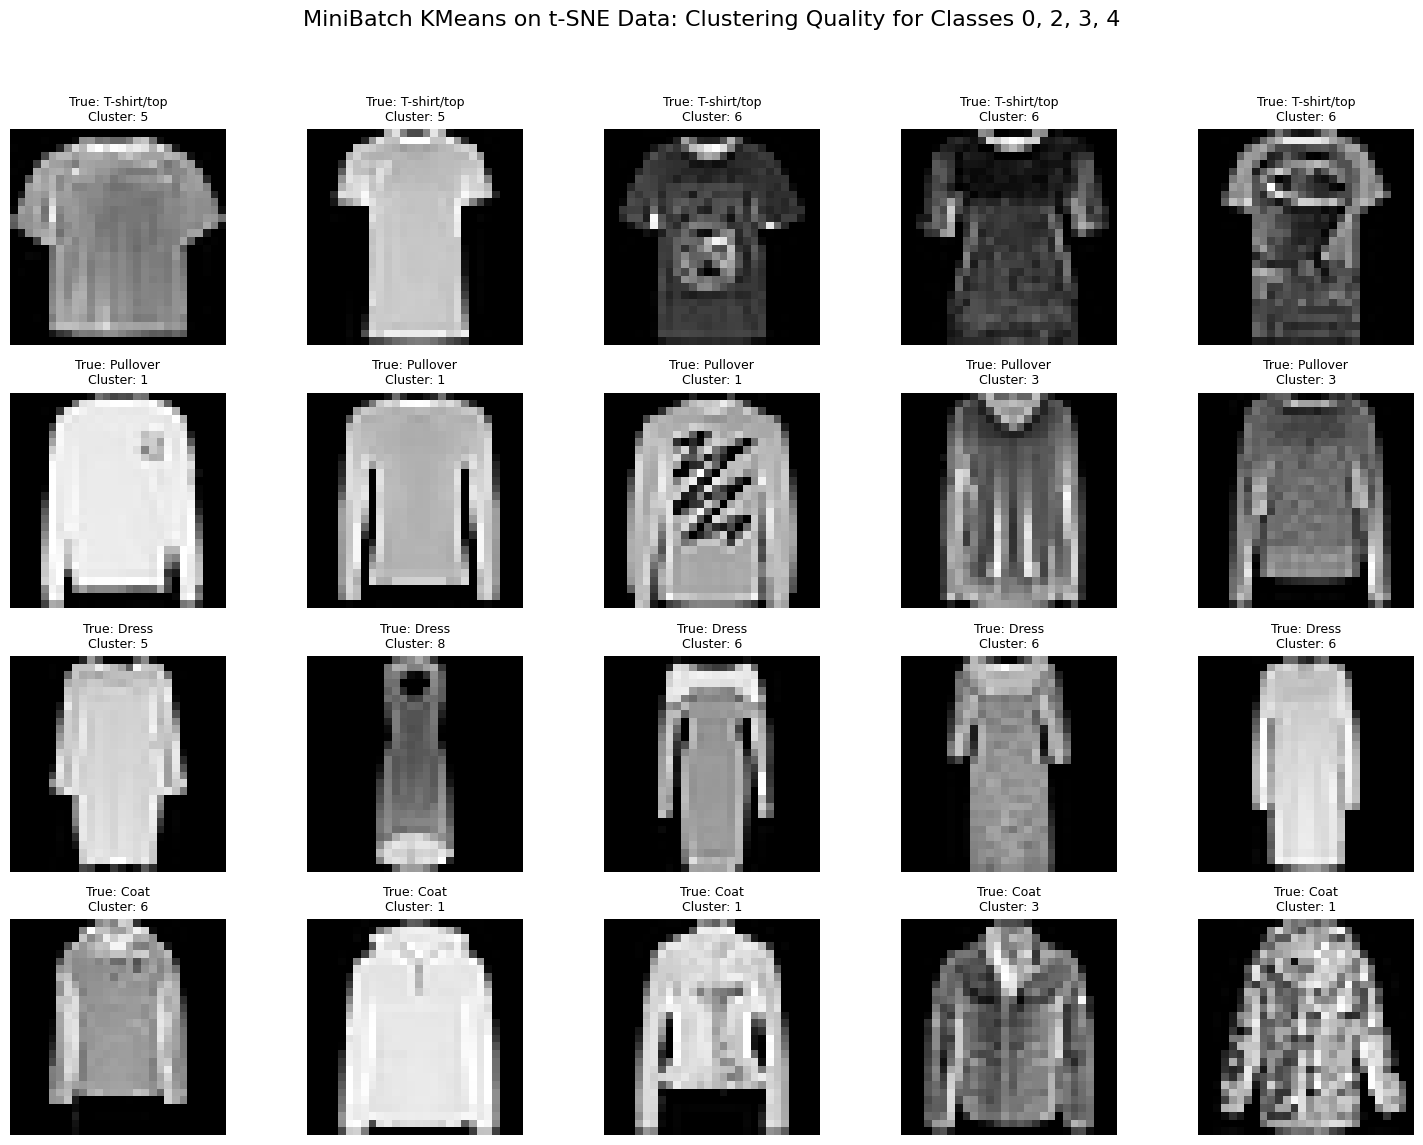

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define Mapping: Map the specific class IDs to names
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Focus specifically on classes 0, 2, 3, and 4.
selected_class_ids = [0, 2, 3, 4]

# 2. Setup Plot: Create a figure with 4 rows (one for each selected class) and 5 columns (random samples).
plt.figure(figsize=(15, 12))
plt.suptitle('MiniBatch KMeans on t-SNE Data: Clustering Quality for Classes 0, 2, 3, 4', fontsize=16)

# Process:
# Iterate through the selected classes
for i, class_id in enumerate(selected_class_ids):
    # Find the indices in y_test that match this class.
    class_indices = np.where(y_test == class_id)[0]

    # Randomly select 5 indices.
    num_samples_to_pick = min(5, len(class_indices))
    if num_samples_to_pick == 0:
        print(f"Warning: No samples found for class ID {class_id} ({class_names.get(class_id, 'Unknown')}). Skipping.")
        continue

    random_sample_indices = np.random.choice(class_indices, num_samples_to_pick, replace=False)

    for j, img_idx in enumerate(random_sample_indices):
        # Display the corresponding image from x_test (reshaped to 28x28).
        original_image = x_test[img_idx]

        # Get true class name
        true_class_name = class_names[y_test[img_idx]]

        # Get the Predicted Cluster from tsne_reduced_mbkmeans_labels.
        assigned_cluster_label = tsne_reduced_mbkmeans_labels[img_idx]

        # Create a subplot (4 rows for classes, 5 columns for images)
        plt.subplot(len(selected_class_ids), 5, i * 5 + j + 1)

        plt.imshow(original_image.reshape(28, 28), cmap='gray')
        plt.axis('off') # hide axis ticks for clarity

        # Set the subplot title to show the Class Name and the Predicted Cluster.
        plt.title(f"True: {true_class_name}\nCluster: {assigned_cluster_label}", fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

ΕΡΩΤΗΜΑ 7 DBSCAN CLUSTERING

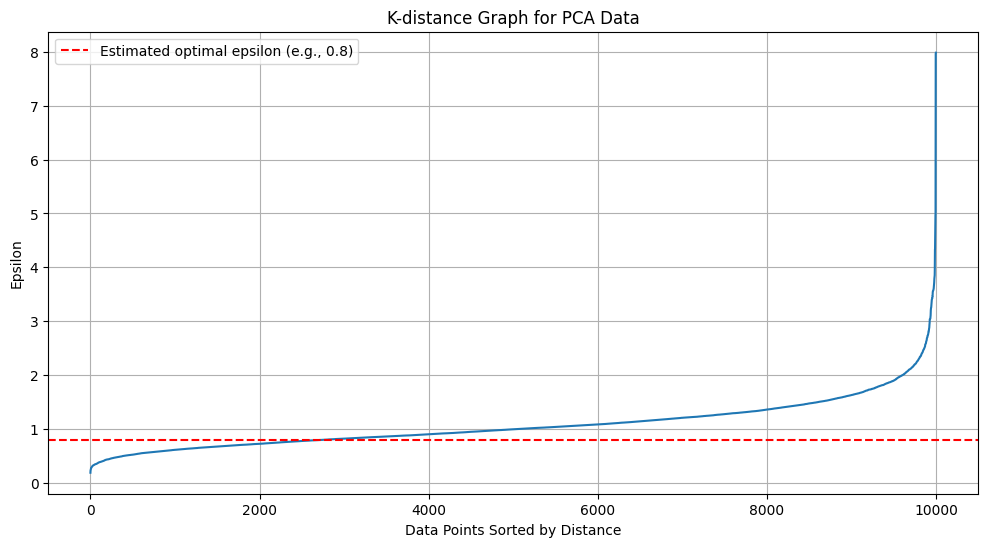

MIN_SAMPLES set to: 5
K-distance plot generated and saved as 'k_distance_plot.png'.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# 1. Set MIN_SAMPLES
MIN_SAMPLES = 5

# 2. Calculate k-distances for x_test_pca
# Instantiate NearestNeighbors with n_neighbors = MIN_SAMPLES
neighbors = NearestNeighbors(n_neighbors=MIN_SAMPLES)
neighbors.fit(x_test_reduced)

# Use kneighbors() to get the distances and indices
distances, indices = neighbors.kneighbors(x_test_reduced)

# Get the distance to the MIN_SAMPLES-th nearest neighbor (which is at index MIN_SAMPLES-1)
# The kneighbors method returns distances including the point itself (distance 0), so the (k-1)th index is the k-distance
k_distances = np.sort(distances[:, MIN_SAMPLES-1], axis=0)

# 3. Plot the sorted k-distances
plt.figure(figsize=(12, 6))
plt.plot(range(len(k_distances)), k_distances)
plt.title('K-distance Graph for PCA Data')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Epsilon')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='Estimated optimal epsilon (e.g., 0.8)') # Placeholder for visual estimation
plt.legend()
plt.savefig('k_distance_plot.png')
plt.show()

print(f"MIN_SAMPLES set to: {MIN_SAMPLES}")
print("K-distance plot generated and saved as 'k_distance_plot.png'.")

In [ ]:
import time
from sklearn.cluster import DBSCAN
import numpy as np

# DBSCAN parameters (using previously established values)
# MIN_SAMPLES was determined in previous step (l7w_HE-5gRXi)
# An estimated optimal epsilon was plotted at 0.8 in k_distance_plot.png

#SOS
# using 0.5 for raw data finds 0 clusters. We change it to 5.0
eps_raw = 5.0
min_samples_raw = MIN_SAMPLES # Using the MIN_SAMPLES from the k-distance analysis
# Using 0.5 for t-SNE found 165 clusters. We change it to 0.3
eps_tsne = 0.3
min_samples_tsne = MIN_SAMPLES # Using the MIN_SAMPLES from the k-distance analysis

print(f"Applying DBSCAN to Raw Data with eps={eps_raw}, min_samples={min_samples_raw}...")
print(f"Applying DBSCAN to t-SNE Data with eps={eps_tsne}, min_samples={min_samples_tsne}...\n")

# --- Execute DBSCAN on Raw Data (x_test_flat) ---
start_time_raw_dbscan = time.time()
dbscan_raw = DBSCAN(eps=eps_raw, min_samples=min_samples_raw)
raw_data_dbscan_labels = dbscan_raw.fit_predict(x_test_flat)
end_time_raw_dbscan = time.time()
raw_data_dbscan_time = end_time_raw_dbscan - start_time_raw_dbscan

# Count clusters for raw data (excluding noise points labeled -1)
num_clusters_raw_dbscan = len(set(raw_data_dbscan_labels)) - (1 if -1 in raw_data_dbscan_labels else 0)

# --- Execute DBSCAN on t-SNE Reduced Data (x_test_reduced) ---
start_time_tsne_dbscan = time.time()
dbscan_tsne = DBSCAN(eps=eps_tsne, min_samples=min_samples_tsne)
tsne_reduced_dbscan_labels = dbscan_tsne.fit_predict(x_test_reduced)
end_time_tsne_dbscan = time.time()
tsne_reduced_dbscan_time = end_time_tsne_dbscan - start_time_tsne_dbscan

# Count clusters for t-SNE reduced data (excluding noise points labeled -1)
num_clusters_tsne_dbscan = len(set(tsne_reduced_dbscan_labels)) - (1 if -1 in tsne_reduced_dbscan_labels else 0)

print(f"Determined optimized_eps_pca: {eps_tsne:.2f}")
print(f"Determined optimized_eps_pca: {eps_raw:.2f}")
print(f"Raw Data DBSCAN - Time: {raw_data_dbscan_time:.4f}s, Clusters: {num_clusters_raw_dbscan}")
print(f"t-SNE Data DBSCAN - Time: {tsne_reduced_dbscan_time:.4f}s, Clusters: {num_clusters_tsne_dbscan}")


Applying DBSCAN to Raw Data with eps=5.0, min_samples=5...
Applying DBSCAN to t-SNE Data with eps=0.3, min_samples=5...

Determined optimized_eps_pca: 0.30
Determined optimized_eps_pca: 5.00
Raw Data DBSCAN - Time: 4.0025s, Clusters: 7
t-SNE Data DBSCAN - Time: 0.0435s, Clusters: 11


Ερώτημα 8 ΜΕΤΡΙΚΕΣ

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score
import numpy as np

def calculate_metrics_safe(data, labels, true_labels):
    # Filter out noise points (-1 label) for internal validation metrics
    # ARI needs all points including noise to compare with true_labels
    non_noise_indices = labels != -1
    data_filtered = data[non_noise_indices]
    labels_filtered = labels[non_noise_indices]
    true_labels_filtered = true_labels[non_noise_indices]

    ch_score, db_score, silhouette_score_val = np.nan, np.nan, np.nan

    # Check if there are at least two unique clusters (excluding noise) and more than one sample
    if len(np.unique(labels_filtered)) >= 2 and len(data_filtered) >= 2:
        ch_score = calinski_harabasz_score(data_filtered, labels_filtered)
        db_score = davies_bouldin_score(data_filtered, labels_filtered)
        silhouette_score_val = silhouette_score(data_filtered, labels_filtered)
    elif len(np.unique(labels_filtered)) == 1 and len(data_filtered) >= 2: # Only one cluster (excluding noise)
        # For single cluster, CH and DB are not defined, Silhouette is 0 or 1 depending on interpretation
        # We set them to nan as per common practice for undefined cases.
        ch_score, db_score, silhouette_score_val = np.nan, np.nan, np.nan

    # Adjusted Rand Index can be calculated for all points (including noise) if desired, or filtered.
    # Here we use all points for ARI as it compares clustering with ground truth.
    ari_score = adjusted_rand_score(true_labels, labels)

    return ch_score, db_score, silhouette_score_val, ari_score


# 2. Call the calculate_metrics_safe function for the raw data
ch_score_raw_dbscan, db_score_raw_dbscan, silhouette_score_raw_dbscan, ari_score_raw_dbscan = \
    calculate_metrics_safe(x_test_flat, raw_data_dbscan_labels, y_test)

# 3. Call the calculate_metrics_safe function for the t-SNE reduced data
ch_score_tsne_dbscan, db_score_tsne_dbscan, silhouette_score_tsne_dbscan, ari_score_tsne_dbscan = \
    calculate_metrics_safe(x_test_reduced, tsne_reduced_dbscan_labels, y_test)

print("DBSCAN Metrics for Raw Data:")
print(f"  Calinski-Harabasz Score: {ch_score_raw_dbscan:.4f}")
print(f"  Davies-Bouldin Score: {db_score_raw_dbscan:.4f}")
print(f"  Silhouette Score: {silhouette_score_raw_dbscan:.4f}")
print(f"  Adjusted Rand Index (ARI): {ari_score_raw_dbscan:.4f}")

print("\nDBSCAN Metrics for t-SNE Reduced Data:")
print(f"  Calinski-Harabasz Score: {ch_score_tsne_dbscan:.4f}")
print(f"  Davies-Bouldin Score: {db_score_tsne_dbscan:.4f}")
print(f"  Silhouette Score: {silhouette_score_tsne_dbscan:.4f}")
print(f"  Adjusted Rand Index (ARI): {ari_score_tsne_dbscan:.4f}")

DBSCAN Metrics for Raw Data:
  Calinski-Harabasz Score: 16.1305
  Davies-Bouldin Score: 1.4402
  Silhouette Score: -0.0964
  Adjusted Rand Index (ARI): 0.0242

DBSCAN Metrics for t-SNE Reduced Data:
  Calinski-Harabasz Score: 369630.2500
  Davies-Bouldin Score: 0.0469
  Silhouette Score: 0.9604
  Adjusted Rand Index (ARI): 0.0000


Ερώτημα 9


In [ ]:
import pandas as pd

# Define the constant N_CLUSTERS (already defined, but good to ensure context)
# N_CLUSTERS = 10

# Append row for Raw data DBSCAN clustering
raw_data_dbscan_row = {
    'Clustering Method': 'DBSCAN (Raw Data)',
    'Dimensionality': f"{x_test_flat.shape[1]}D",
    'N_Clusters': num_clusters_raw_dbscan, # Number of actual clusters found by DBSCAN
    'Clustering Time (s)': raw_data_dbscan_time,
    'Dimensionality Reduction Time (s)': 0.0, # No dimensionality reduction for raw data
    'Calinski-Harabasz Score': ch_score_raw_dbscan,
    'Davies-Bouldin Score': db_score_raw_dbscan,
    'Silhouette Score': silhouette_score_raw_dbscan,
    'Adjusted Rand Index (ARI)': ari_score_raw_dbscan
}
results_df = pd.concat([results_df, pd.DataFrame([raw_data_dbscan_row])], ignore_index=True)

# Append row for t-SNE reduced data DBSCAN clustering
tsne_data_dbscan_row = {
    'Clustering Method': 'DBSCAN (t-SNE Reduced Data)',
    'Dimensionality': f"{x_test_reduced.shape[1]}D",
    'N_Clusters': num_clusters_tsne_dbscan, # Number of actual clusters found by DBSCAN
    'Clustering Time (s)': tsne_reduced_dbscan_time,
    'Dimensionality Reduction Time (s)': tsne_train_time, # t-SNE training time
    'Calinski-Harabasz Score': ch_score_tsne_dbscan,
    'Davies-Bouldin Score': db_score_tsne_dbscan,
    'Silhouette Score': silhouette_score_tsne_dbscan,
    'Adjusted Rand Index (ARI)': ari_score_tsne_dbscan
}
results_df = pd.concat([results_df, pd.DataFrame([tsne_data_dbscan_row])], ignore_index=True)

# Print the final DataFrame
print("\n--- Updated Clustering Results Summary ---")
display(results_df)


--- Updated Clustering Results Summary ---


,Clustering Method,Dimensionality,N_Clusters,Clustering Time (s),Dimensionality Reduction Time (s),Calinski-Harabasz Score,Davies-Bouldin Score,Silhouette Score,Adjusted Rand Index (ARI),DR Training Time (s),Suggested Clusters (K)
0,MiniBatch KMeans (Raw Data),784D,10,0.070786,0.000000,1240.075073,1.986091,0.144434,0.317323,NaN,NaN
1,MiniBatch KMeans (t-SNE Reduced Data),2D,NaN,0.009732,NaN,10394.458008,0.829511,0.392767,0.417736,298.383567,10.0
2,DBSCAN (Raw Data),784D,7,4.002473,0.000000,16.130520,1.440171,-0.096445,0.024196,NaN,NaN
3,DBSCAN (t-SNE Reduced Data),2D,11,0.043465,298.383567,369630.250000,0.046933,0.960396,0.000006,NaN,NaN


Ερώτημα 10 ΟΠΤΙΚΟΠΟΙΗΣΗ

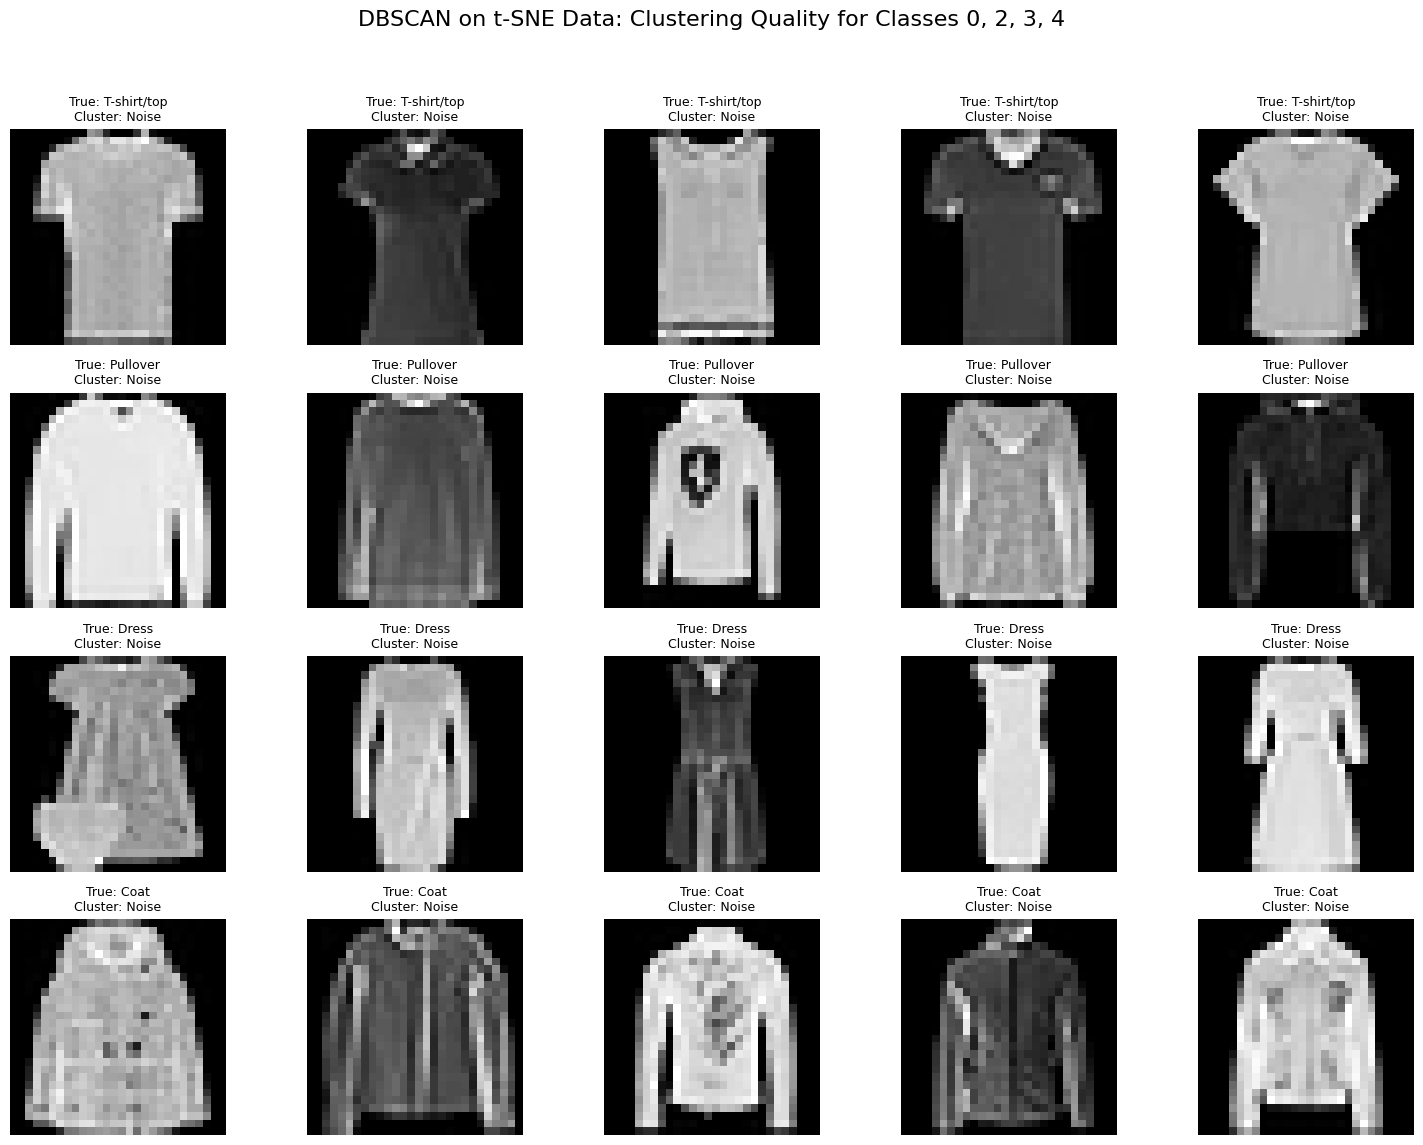

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define Mapping: Use the same class mapping
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Use the same 4 classes for direct comparison
selected_class_ids = [0, 2, 3, 4]

# 2. Setup Plot: Create a figure with 4 rows and 5 columns.
plt.figure(figsize=(15, 12))
plt.suptitle('DBSCAN on t-SNE Data: Clustering Quality for Classes 0, 2, 3, 4', fontsize=16)

# Process:
# Iterate through the selected classes
for i, class_id in enumerate(selected_class_ids):
    # Find the indices in y_test that match this class.
    class_indices = np.where(y_test == class_id)[0]

    # Randomly select 5 indices.
    num_samples_to_pick = min(5, len(class_indices))
    if num_samples_to_pick == 0:
        print(f"Warning: No samples found for class ID {class_id} ({class_names.get(class_id, 'Unknown')}). Skipping.")
        continue

    random_sample_indices = np.random.choice(class_indices, num_samples_to_pick, replace=False)

    for j, img_idx in enumerate(random_sample_indices):
        # Display the corresponding image from x_test (reshaped to 28x28).
        original_image = x_test[img_idx]

        # Get true class name
        true_class_name = class_names[y_test[img_idx]]

        # Crucial: Get the predicted cluster label from tsne_reduced_dbscan_labels.
        assigned_cluster_label = tsne_reduced_dbscan_labels[img_idx]

        # Note: If the cluster is -1, it means DBSCAN considered this image as 'Noise'.
        display_cluster_label = 'Noise' if assigned_cluster_label == -1 else str(assigned_cluster_label)

        # Create a subplot (4 rows for classes, 5 columns for images)
        plt.subplot(len(selected_class_ids), 5, i * 5 + j + 1)

        # Visualization: Display the image (28x28). Style: Use cmap='gray' and hide axis ticks.
        plt.imshow(original_image.reshape(28, 28), cmap='gray')
        plt.axis('off') # hide axis ticks for clarity

        # Title: Set the subplot title to show the True Class and the DBSCAN Cluster.
        plt.title(f"True: {true_class_name}\nCluster: {display_cluster_label}", fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

Ερώτημα 7 για την 3η τεχνική "Agglomerative Clustering "

In [ ]:
import time
from sklearn.cluster import AgglomerativeClustering

# Configuration
N_CLUSTERS = 10 # Fashion-MNIST has 10 classes

print(f"Applying Agglomerative Clustering with n_clusters={N_CLUSTERS} and linkage='ward'\n")

# --- Execution on Raw Data (x_test_flat) ---
start_time_raw_agglo = time.time()
agglo_raw = AgglomerativeClustering(n_clusters=N_CLUSTERS, linkage='ward')
raw_data_agglo_labels = agglo_raw.fit_predict(x_test_flat)
end_time_raw_agglo = time.time()
raw_data_agglo_time = end_time_raw_agglo - start_time_raw_agglo

# --- Execution on t-SNE Data (x_test_reduced) ---
start_time_tsne_agglo = time.time()
agglo_tsne = AgglomerativeClustering(n_clusters=N_CLUSTERS, linkage='ward')
tsne_reduced_agglo_labels = agglo_tsne.fit_predict(x_test_reduced)
end_time_tsne_agglo = time.time()
tsne_reduced_agglo_time = end_time_tsne_agglo - start_time_tsne_agglo

print(f"Agglomerative Clustering on Raw Data ({x_test_flat.shape[1]}D) completed in {raw_data_agglo_time:.4f} seconds.")
print(f"Shape of raw_data_agglo_labels: {raw_data_agglo_labels.shape}")
print(f"Agglomerative Clustering on t-SNE Data ({x_test_reduced.shape[1]}D) completed in {tsne_reduced_agglo_time:.4f} seconds.")
print(f"Shape of tsne_reduced_agglo_labels: {tsne_reduced_agglo_labels.shape}")

Applying Agglomerative Clustering with n_clusters=10 and linkage='ward'

Agglomerative Clustering on Raw Data (784D) completed in 27.5712 seconds.
Shape of raw_data_agglo_labels: (10000,)
Agglomerative Clustering on t-SNE Data (2D) completed in 3.5226 seconds.
Shape of tsne_reduced_agglo_labels: (10000,)


Ερώτημα 8

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score
import numpy as np

print("Calculating Agglomerative Clustering Performance Metrics:\n")

# --- Metrics for Agglomerative Clustering on Raw Data (x_test_flat) ---
print("Metrics for Raw Data Agglomerative Clustering (784D):")
ch_score_raw_agglo = calinski_harabasz_score(x_test_flat, raw_data_agglo_labels)
db_score_raw_agglo = davies_bouldin_score(x_test_flat, raw_data_agglo_labels)
silhouette_score_raw_agglo = silhouette_score(x_test_flat, raw_data_agglo_labels)
ari_score_raw_agglo = adjusted_rand_score(y_test, raw_data_agglo_labels)

print(f"  Calinski-Harabasz Score: {ch_score_raw_agglo:.4f}")
print(f"  Davies-Bouldin Score: {db_score_raw_agglo:.4f}")
print(f"  Silhouette Score: {silhouette_score_raw_agglo:.4f}")
print(f"  Adjusted Rand Index (ARI): {ari_score_raw_agglo:.4f}\n")

# --- Metrics for Agglomerative Clustering on t-SNE Reduced Data (x_test_reduced) ---
print("Metrics for t-SNE Reduced Data Agglomerative Clustering (2D):")
ch_score_tsne_agglo = calinski_harabasz_score(x_test_reduced, tsne_reduced_agglo_labels)
db_score_tsne_agglo = davies_bouldin_score(x_test_reduced, tsne_reduced_agglo_labels)
silhouette_score_tsne_agglo = silhouette_score(x_test_reduced, tsne_reduced_agglo_labels)
ari_score_tsne_agglo = adjusted_rand_score(y_test, tsne_reduced_agglo_labels)

print(f"  Calinski-Harabasz Score: {ch_score_tsne_agglo:.4f}")
print(f"  Davies-Bouldin Score: {db_score_tsne_agglo:.4f}")
print(f"  Silhouette Score: {silhouette_score_tsne_agglo:.4f}")
print(f"  Adjusted Rand Index (ARI): {ari_score_tsne_agglo:.4f}")

Calculating Agglomerative Clustering Performance Metrics:

Metrics for Raw Data Agglomerative Clustering (784D):
  Calinski-Harabasz Score: 1116.1278
  Davies-Bouldin Score: 1.9335
  Silhouette Score: 0.1168
  Adjusted Rand Index (ARI): 0.3478

Metrics for t-SNE Reduced Data Agglomerative Clustering (2D):
  Calinski-Harabasz Score: 10398.7568
  Davies-Bouldin Score: 0.8133
  Silhouette Score: 0.3863
  Adjusted Rand Index (ARI): 0.4108


Ερώτημα 9

In [ ]:
import pandas as pd

# Define the constant N_CLUSTERS (already defined, but good to ensure context)
# N_CLUSTERS = 10

# Append row for Raw data Agglomerative clustering
raw_data_agglo_row = {
    'Clustering Method': 'Agglomerative Clustering (Raw Data)',
    'Dimensionality': f"{x_test_flat.shape[1]}D",
    'N_Clusters': N_CLUSTERS,
    'Clustering Time (s)': raw_data_agglo_time,
    'Dimensionality Reduction Time (s)': 0.0, # No dimensionality reduction for raw data
    'Calinski-Harabasz Score': ch_score_raw_agglo,
    'Davies-Bouldin Score': db_score_raw_agglo,
    'Silhouette Score': silhouette_score_raw_agglo,
    'Adjusted Rand Index (ARI)': ari_score_raw_agglo
}
results_df = pd.concat([results_df, pd.DataFrame([raw_data_agglo_row])], ignore_index=True)

# Append row for t-SNE reduced data Agglomerative clustering
tsne_data_agglo_row = {
    'Clustering Method': 'Agglomerative Clustering (t-SNE Reduced Data)',
    'Dimensionality': f"{x_test_reduced.shape[1]}D",
    'N_Clusters': N_CLUSTERS,
    'Clustering Time (s)': tsne_reduced_agglo_time,
    'Dimensionality Reduction Time (s)': tsne_train_time, # t-SNE training time
    'Calinski-Harabasz Score': ch_score_tsne_agglo,
    'Davies-Bouldin Score': db_score_tsne_agglo,
    'Silhouette Score': silhouette_score_tsne_agglo,
    'Adjusted Rand Index (ARI)': ari_score_tsne_agglo
}
results_df = pd.concat([results_df, pd.DataFrame([tsne_data_agglo_row])], ignore_index=True)

# Print the final DataFrame
print("\n--- Final Clustering Results Summary ---")
display(results_df)


--- Final Clustering Results Summary ---


,Clustering Method,Dimensionality,N_Clusters,Clustering Time (s),Dimensionality Reduction Time (s),Calinski-Harabasz Score,Davies-Bouldin Score,Silhouette Score,Adjusted Rand Index (ARI),DR Training Time (s),Suggested Clusters (K)
0,MiniBatch KMeans (Raw Data),784D,10,0.070786,0.000000,1240.075073,1.986091,0.144434,0.317323,NaN,NaN
1,MiniBatch KMeans (t-SNE Reduced Data),2D,NaN,0.009732,NaN,10394.458008,0.829511,0.392767,0.417736,298.383567,10.0
2,DBSCAN (Raw Data),784D,7,4.002473,0.000000,16.130520,1.440171,-0.096445,0.024196,NaN,NaN
3,DBSCAN (t-SNE Reduced Data),2D,11,0.043465,298.383567,369630.250000,0.046933,0.960396,0.000006,NaN,NaN
4,Agglomerative Clustering (Raw Data),784D,10,27.571241,0.000000,1116.127808,1.933462,0.116826,0.347787,NaN,NaN
5,Agglomerative Clustering (t-SNE Reduced Data),2D,10,3.522594,298.383567,10398.756836,0.813292,0.386276,0.410804,NaN,NaN
6,Agglomerative Clustering (Raw Data),784D,10,27.571241,0.000000,1116.127808,1.933462,0.116826,0.347787,NaN,NaN
7,Agglomerative Clustering (t-SNE Reduced Data),2D,10,3.522594,298.383567,10398.756836,0.813292,0.386276,0.410804,NaN,NaN


Ερώτημα 10

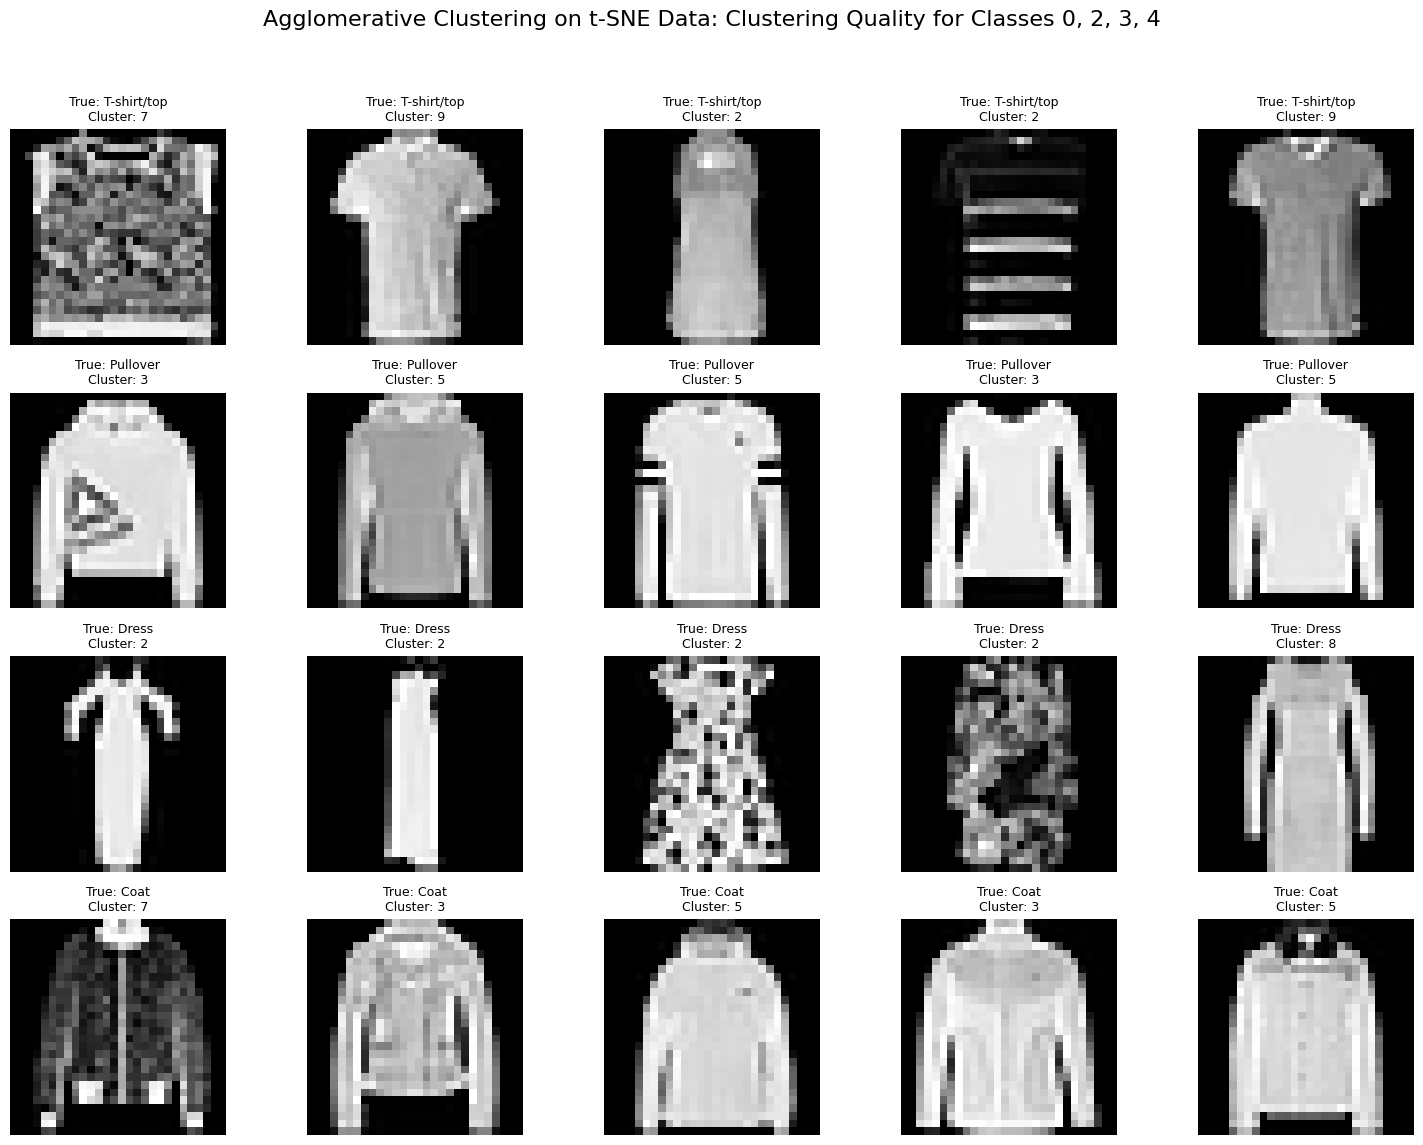

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define Mapping: Map the specific class IDs to names
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Focus specifically on classes 0, 2, 3, and 4.
selected_class_ids = [0, 2, 3, 4]

# 2. Setup Plot: Create a figure with 4 rows (one for each selected class) and 5 columns (random samples).
plt.figure(figsize=(15, 12))
plt.suptitle('Agglomerative Clustering on t-SNE Data: Clustering Quality for Classes 0, 2, 3, 4', fontsize=16)

# Process:
# Iterate through the selected classes
for i, class_id in enumerate(selected_class_ids):
    # Find the indices in y_test that match this class.
    class_indices = np.where(y_test == class_id)[0]

    # Randomly select 5 indices.
    num_samples_to_pick = min(5, len(class_indices))
    if num_samples_to_pick == 0:
        print(f"Warning: No samples found for class ID {class_id} ({class_names.get(class_id, 'Unknown')}). Skipping.")
        continue

    random_sample_indices = np.random.choice(class_indices, num_samples_to_pick, replace=False)

    for j, img_idx in enumerate(random_sample_indices):
        # Display the corresponding image from x_test (reshaped to 28x28).
        original_image = x_test[img_idx]

        # Get true class name
        true_class_name = class_names[y_test[img_idx]]

        # Crucial: Get the predicted cluster label from tsne_reduced_agglo_labels.
        assigned_cluster_label = tsne_reduced_agglo_labels[img_idx]

        # Create a subplot (4 rows for classes, 5 columns for images)
        plt.subplot(len(selected_class_ids), 5, i * 5 + j + 1)

        plt.imshow(original_image.reshape(28, 28), cmap='gray')
        plt.axis('off') # hide axis ticks for clarity

        # Set the subplot title to show the Class Name and the Predicted Cluster.
        plt.title(f"True: {true_class_name}\nCluster: {assigned_cluster_label}", fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()